<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">

<br>

<div style="font-weight:700;font-size:25px">  [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course </div>

<br>

Auteur: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Traduit et édité par Christina Butsko, Gleb Filatov, [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) et [Ousmane Cissé](https://github.com/oussou-dev). Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). L'utilisation gratuite est autorisée à des fins non commerciales.

# <center>Thème 3. Classification, arbres de décision et k plus proches voisins

<h1>Sommaire de l'article<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-0">1. Introduction</a></span></li><li><span><a href="#2.-Arbre-de-décision" data-toc-modified-id="2.-Arbre-de-décision-1">2. Arbre de décision</a></span></li><li><span><a href="#3.-La-méthode-des-plus-proches-voisins" data-toc-modified-id="3.-La-méthode-des-plus-proches-voisins-2">3. La méthode des plus proches voisins</a></span></li><li><span><a href="#4.-Choix-des-paramètres-du-modèle-et-validation-croisée" data-toc-modified-id="4.-Choix-des-paramètres-du-modèle-et-validation-croisée-3">4. Choix des paramètres du modèle et validation croisée</a></span></li><li><span><a href="#5.-Exemples-d'application-et-cas-complexes" data-toc-modified-id="5.-Exemples-d'application-et-cas-complexes-4">5. Exemples d'application et cas complexes</a></span></li><li><span><a href="#6.-Avantages-et-inconvénients-des-arbres-de-décision-et-de-la-méthode-des-K-NN" data-toc-modified-id="6.-Avantages-et-inconvénients-des-arbres-de-décision-et-de-la-méthode-des-K-NN-5">6. Avantages et inconvénients des arbres de décision et de la méthode des K-NN</a></span></li><li><span><a href="#7.-Mission-de-démonstration" data-toc-modified-id="7.-Mission-de-démonstration-6">7. Mission de démonstration</a></span></li><li><span><a href="#8.-Ressources-utiles" data-toc-modified-id="8.-Ressources-utiles-7">8. Ressources utiles</a></span></li></ul></div>

## 1. Introduction

Avant de plonger dans le sujet de l'article de cette semaine, parlons du type de problème que nous allons résoudre et de sa place dans le domaine passionnant de l'apprentissage automatique. Le livre de T. Mitchell "Machine Learning" (1997) donne une définition classique et générale de l’apprentissage par machine :

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

> On dit qu'un programme informatique apprend de l'expérience E par rapport à une certaine classe de tâches T et à la mesure de performance P, si sa performance aux tâches en T, telle que mesurée par P, s'améliore avec l'expérience E

Dans les différents réglages du problème, T, P et E peuvent faire référence à des choses complètement différentes. Certaines des tâches les plus courantes dans l’apprentissage automatique sont les suivantes:

- la classification d'une instance (observation) dans l'une des catégories en fonction de ses caractéristiques;
- régression - prédiction d'une entité cible numérique en fonction d'autres caractéristiques d'une instance;
- regroupement - identification des regroupements d'instances sur la base des caractéristiques de ces instances, de sorte que les membres des groupes se ressemblent davantage que ceux des autres groupes;
- détection d'anomalie - recherche d'instances qui sont "très dissemblables" par rapport au reste de l'échantillon ou à un groupe d'instances;
- et tant d'autres.

Un bon aperçu est fourni dans le chapitre "Deep Learning" de ["Machine Learning basics"](http://www.deeplearningbook.org) (par Ian Goodfellow, Yoshua Bengio, Aaron Courville, 2016).

L'expérience E fait référence aux données (nous ne pouvons aller nulle part sans elles). Les algorithmes d'apprentissage machine peuvent être divisés en ceux qui sont entrainés de manière supervisée ou et ceux qui le sont de manière non supervisée. Dans les tâches d'apprentissage non supervisées, on dispose d'un ensemble constitué d'instances décrites par un ensemble de caractéristiques. Dans les problèmes d'apprentissage supervisé, il y a en plus une variable cible, ce que nous aimerions pouvoir prédire, connue pour chaque instance dans les données d'entraînement.

<div style="font-weight:900; font-size:20px"> Exemple </div>
<br>
La classification et la régression sont des problèmes d'apprentissage supervisé. Par exemple, en tant qu’établissement de crédit, nous pouvons souhaiter prévoir les défauts de remboursement des prêts en fonction des données accumulées sur nos clients. Dans ce cas, l’expérience E correspond aux données disponibles ou données d'entraînement : un ensemble d’instances (clients), un ensemble de caractéristiques (telles que l’âge, le salaire, le type de prêt, les défauts de prêt antérieurs, etc.) pour chacune d’entre elles et une variable cible (défaut sur le prêt). Cette variable cible est une indication sur le défaut de remboursement (1 ou 0), retenez qu’il s’agit d’un problème de classification (binaire). Si vous deviez plutôt prédire de combien de temps le remboursement du prêt est en retard, cela deviendrait un problème de régression.
 
Enfin, le troisième terme utilisé dans la définition de l’apprentissage automatique est une métrique de l’évaluation de la performance de l’algorithme P. Ces métriques diffèrent selon les problèmes et les algorithmes. Nous en discuterons lors de l’étude de nouveaux algorithmes. Pour l'instant, nous allons faire référence à une métrique simple pour les algorithmes de classification, la proportion de réponses correctes - la précision (ou la justesse) - sur l'ensemble des données de test.
 
Examinons les deux problèmes d'apprentissage supervisé : la classification et la régression.

## 2. Arbre de décision
Nous commençons notre aperçu des méthodes de classification et de régression par l’un des plus populaires : un arbre de décision. Les arbres de décision sont utilisés dans les décisions de la vie quotidienne, pas seulement dans l'apprentissage automatique. Les "diagrammes de flux" sont en réalité des représentations visuelles des arbres de décision. Par exemple, la **Higher School of Economics** publie des diagrammes d’information pour faciliter la vie de ses employés. Voici un extrait d'instructions pour la publication d'un document sur site web de l'institution.

<img align='center' src='https://habrastorage.org/webt/wh/ty/tf/whtytf2hxotbnhymqno6vmcivr4.png' width=60%><br>

En termes d’apprentissage automatique, on peut le considérer comme un simple classifieur qui détermine la forme de publication appropriée (livre, article, chapitre du livre, pré-impression, publication dans "Higher School of Economics and the Media") en fonction du contenu (livre, brochure, papier), type de revue, type de publication (revue scientifique, compte rendu), etc.
 
Un arbre de décision est souvent une généralisation de l'expérience des experts, un moyen de partager les connaissances d'un processus particulier. Par exemple, avant l'introduction d'algorithmes d'apprentissage automatique évolutifs, la tâche de notation du crédit dans le secteur bancaire avait été résolue par des experts. La décision d'accorder un prêt a été prise sur la base de règles dérivées de manière intuitive (ou empirique) pouvant être représentées sous la forme d'un arbre de décision.

<img src="https://habrastorage.org/webt/p4/lm/sh/p4lmshrp9wh_2locm5sei23h7qc.png"><br>

Dans notre cas suivant, nous résolvons un problème de classification binaire (approuver / refuser un prêt) basé sur les caractéristiques "Âge", "Accession à la propriété", "Revenu" et "Éducation" ("Age", "Home-ownership", "Income", and "Education").
 
L'arbre de décision en tant qu'algorithme d'apprentissage machine est essentiellement la même chose que le diagramme présenté ci-dessus; nous incorporons un flux de règles logiques de la forme "valeur de la caractéristique $a$ est inférieure à $x$ et valeur de la caractéristique $b$ est inférieure à $y$ ... => Catégorie 1" dans une structure de données arborescente. L'avantage de ces algorithmes est qu'ils sont facilement interprétables. Par exemple, en utilisant le schéma ci-dessus, la banque peut expliquer au client la raison pour laquelle un prêt lui a été refusé : par exemple, la cliente ne possède pas de maison et son revenu est inférieur à 5 000.

Comme nous le verrons plus tard, de nombreux autres modèles, bien que plus précis, ne possèdent pas cette propriété et peuvent être considérés comme une approche de type "boîte noire", dans laquelle il est plus difficile d'interpréter comment les données d'entrée ont été transformées en sortie. En raison de cette "compréhensibilité" et de la similitude avec la prise de décision humaine (vous pouvez facilement expliquer votre modèle à votre patron), les arbres de décision ont acquis une immense popularité. L'algorithme C4.5, représentant de ce groupe de méthodes de classification, est même le premier de la liste des 10 meilleurs algorithmes de (data mining) exploration de données ("Top 10 Algorithms in Data Mining", Knowledge and Information Systems, 2008. [ResearchGate](https://www.researchgate.net/publication/29467751_Top_10_algorithmes_in_data_mining)).

<div style="font-weight:700; font-size:20px"> Comment construire un arbre de décision </div>
<br>
Nous avons vu précédemment que la décision d'accorder un prêt est prise en fonction de l'âge, de l'actif, du revenu et d'autres variables. Mais quelle variable regarder en premier ? Voyons un exemple simple où toutes les variables sont binaires.
 
Rappelez-vous le jeu des "20 questions", qui est souvent référencé lors de l’introduction des arbres de décision. Vous avez probablement déjà joué à ce jeu - une personne pense à une célébrité tandis que l'autre essaie de deviner en posant seulement des questions "Oui" ou "Non". Quelle question le devineur posera-t-il en premier ? Bien sûr, la question à poser est celle qui réduit le plus le nombre d'options restantes. Demander "Est-ce Angelina Jolie?" En cas de réponse négative, exclue une célébrité mais une dans un large domaine du possible. En revanche, demander "La célébrité est-elle une femme?" réduirait les possibilités à environ la moitié. C'est-à-dire que la caractéristique "genre" sépare le jeu de données de célébrités bien mieux que d'autres caractéristiques telles que "Angelina Jolie", "espagnol" ou "aime le football". Ce raisonnement correspond au concept de gain d'information basé sur l'entropie.

<div style="font-weight:700;font-size:20px"> Entropie </div>

L'entropie de Shannon est définie pour un système avec N états possibles comme suit :

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

où $p_i$ est la probabilité de trouver le système dans le $i$ ème état. C'est un concept très important utilisé en physique, en théorie de l'information et dans d'autres domaines. L'entropie peut être décrite comme le degré de chaos dans le système. Plus l'entropie est élevée, moins le système est ordonné et vice versa. Cela nous aidera à formaliser la "division effective des données", auquelle nous avons fait allusion dans le contexte du jeu des "20 questions".

<div style="font-weight:700;font-size:25px"> Exemple basé sur un jeu </div>
<br>
Pour illustrer comment l'entropie peut nous aider à identifier de bonnes caractéristiques pour la construction d'un arbre de décision, examinons un exemple basé sur un jeu. Nous allons prédire la couleur de la boule en fonction de sa position.

<img align='center' src='https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'><br>

Il y a 9 boules bleues et 11 boules jaunes. Si nous tirons une boule au hasard, elle sera bleue avec la probabilité $p_1=\frac{9}{20}$ et jaune avec la probabilité $p_2=\frac{11}{20}$, ce qui nous donne une entropie $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. Cette valeur en elle-même ne nous en dit peut-être pas beaucoup, mais voyons comment cette valeur changerait si nous divisions les boules en deux groupes : avec une position inférieure ou égale à 12 et supérieure à 12.

<img align='center' src='https://habrastorage.org/webt/5k/ur/88/5kur88sfin6hoffp6ljbyktcur4.png'><br>


Le groupe de gauche a 13 boules, 8 bleues et 5 jaunes. L'entropie de ce groupe est $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. Le groupe de droite a 7 balles, 1 bleue et 6 jaunes. L'entropie du groupe de droite est $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. Comme vous pouvez le constater, l'entropie a diminué dans les deux groupes, plus encore dans le groupe de droite. L'entropie étant en fait le degré de chaos (ou d'incertitude) du système, la réduction de l'entropie est appelée gain d'information. Formellement, le gain d’information (IG) pour une division basée sur la variable $Q$ (dans cet exemple, il s’agit d’une variable "$x \leq 12$") est défini comme suit:

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

où $q$ est le nombre de groupes après la scission, $N_i$ est le nombre d'objets de l'échantillon dans lesquels la variable $Q$ est égale à la valeur $i$. Dans notre exemple, notre scission a donné deux groupes ($q = 2$), l’un avec 13 éléments ($N_1 = 13$), l’autre avec 7 ($N_2 = 7$). Par conséquent, nous pouvons calculer le gain d’information comme

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Il s'est avéré que diviser les boules en deux groupes à partir de "la coordonnée est inférieure ou égale à 12" nous a donné un système plus ordonné. Continuons à les diviser en groupes jusqu'à ce que les boules de chaque groupe soient toutes de la même couleur.

<img align='center' src='https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png'><br>

Pour le groupe de droite, nous pouvons facilement constater que nous n’avons besoin que d’une partition supplémentaire utilisant "coordonnée inférieure ou égale à 18". Mais pour le groupe de gauche, il nous en faut trois autres. Notez que l'entropie d'un groupe où toutes les boules ont la même couleur est égale à 0 ($\log_2{1} = 0$).

Nous avons construit avec succès un arbre de décision qui prédit la couleur de la boule en fonction de sa position. Cet arbre de décision risque de ne pas bien fonctionner si nous ajoutons des balles, car il est parfaitement adapté à l'ensemble d'entraînement (20 boules initiales). Si nous voulions bien réussir dans ce cas, un arbre avec moins de "questions" ou de divisions serait plus précis, même s'il ne correspondait pas parfaitement aux données d'entraînement. Nous discuterons du problème du sur-apprentissage (overfitting) plus tard.

<div style="font-weight:700;font-size:20px">Algorithme des arbres de décision</div>


Nous pouvons nous assurer que l'arborescence construite dans l'exemple précédent est optimale : il n'a fallu que 5 "questions" (conditionnées par la variable $x$) pour adapter parfaitement un arbre de décision à l'ensemble des données (dataset). Dans d’autres conditions de division, l’arbre résultant serait plus profond, c’est-à-dire qu’il faudrait plus de "questions" pour obtenir une réponse.
 
Le principe de la maximisation du gain d’information est au cœur des algorithmes populaires de construction d’arbres de décision, tels que ID3 ou C4.5 : à chaque étape, l’algorithme choisit la variable qui donne le plus grand gain d’information lors du partage. Ensuite, la procédure est répétée de manière récursive jusqu'à ce que l'entropie soit égale à zéro (ou à une valeur faible pour tenir compte du sur-apprentissage). Différents algorithmes utilisent des méthodes heuristiques différentes pour "arrêter tôt" ou "couper" afin d'éviter de construire un arbre surchargé.

```python

def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  
```

<div style="font-weight:700;font-size:20px"> Autres critères de qualité pour les partitions ou divisions dans les problèmes de classification </div>


Nous avons discuté de la manière dont l'entropie nous permet de formaliser des partitions dans un arbre. Mais ce n’est qu’une heuristique; il en existe d'autres:

- Incertitude de Gini (impureté de Gini) : $G = 1 - \sum\limits_k (p_k)^2$. Maximiser ce critère peut être interprété comme la maximisation du nombre de paires d'objets de la même classe qui sont dans le même sous-arbre (à ne pas confondre avec l'index de Gini).  <br> <br>

- Erreur de classification: $E = 1 - \max\limits_k p_k$

En pratique, les erreurs de classification erronées ne sont presque jamais utilisées et l'incertitude de Gini et les gains d'informations fonctionnent de manière similaire.
 
Pour la classification binaire, l’entropie et l’incertitude de Gini se présentent comme suit:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

où ($p_+$ est la probabilité qu'un objet ait une étiquette +).

Si nous comparons ces deux fonctions à l'argument $p_+$, nous verrons que le tracé d'entropie est très proche du tracé d'incertitude de Gini, doublé. Par conséquent, dans la pratique, ces deux critères sont presque identiques.

In [34]:
# nous n'aimons pas les avertissements (générés par le notebook)
# vous pouvez commenter les 2 lignes suivantes si vous souhaitez les voir
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

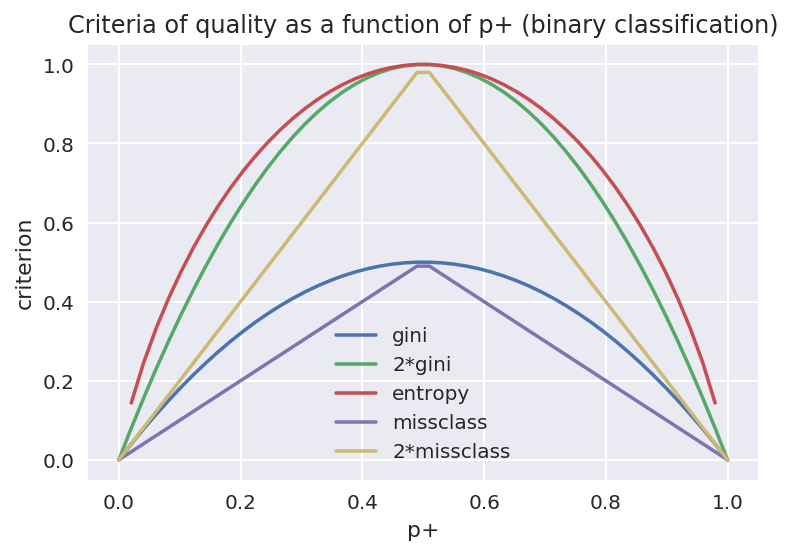

In [16]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

<div style="font-weight:700; font-size:20px"> Exemple </div>

Considérons l’entraînement d’un arbre de décision à des données synthétiques. Nous allons générer des échantillons à partir de deux classes, les deux sont de distributions normales (ou gaussiennes) mais avec des moyens différents.

In [35]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Nous allons tracer les données. De manière informelle, le problème de classification dans ce cas est de construire une "bonne" limite séparant les deux classes (les points rouges des points jaunes). Dans ce cas, l’apprentissage automatique se résume à choisir une bonne frontière de séparation. Une ligne droite sera trop simple alors qu'une courbe complexe se faufilant autour de chaque point rouge sera trop complexe et nous conduira à faire des erreurs sur de nouveaux échantillons. Intuitivement, une limite lisse, ou au moins une ligne droite ou un hyperplan, conviendrait parfaitement pour les nouvelles données.

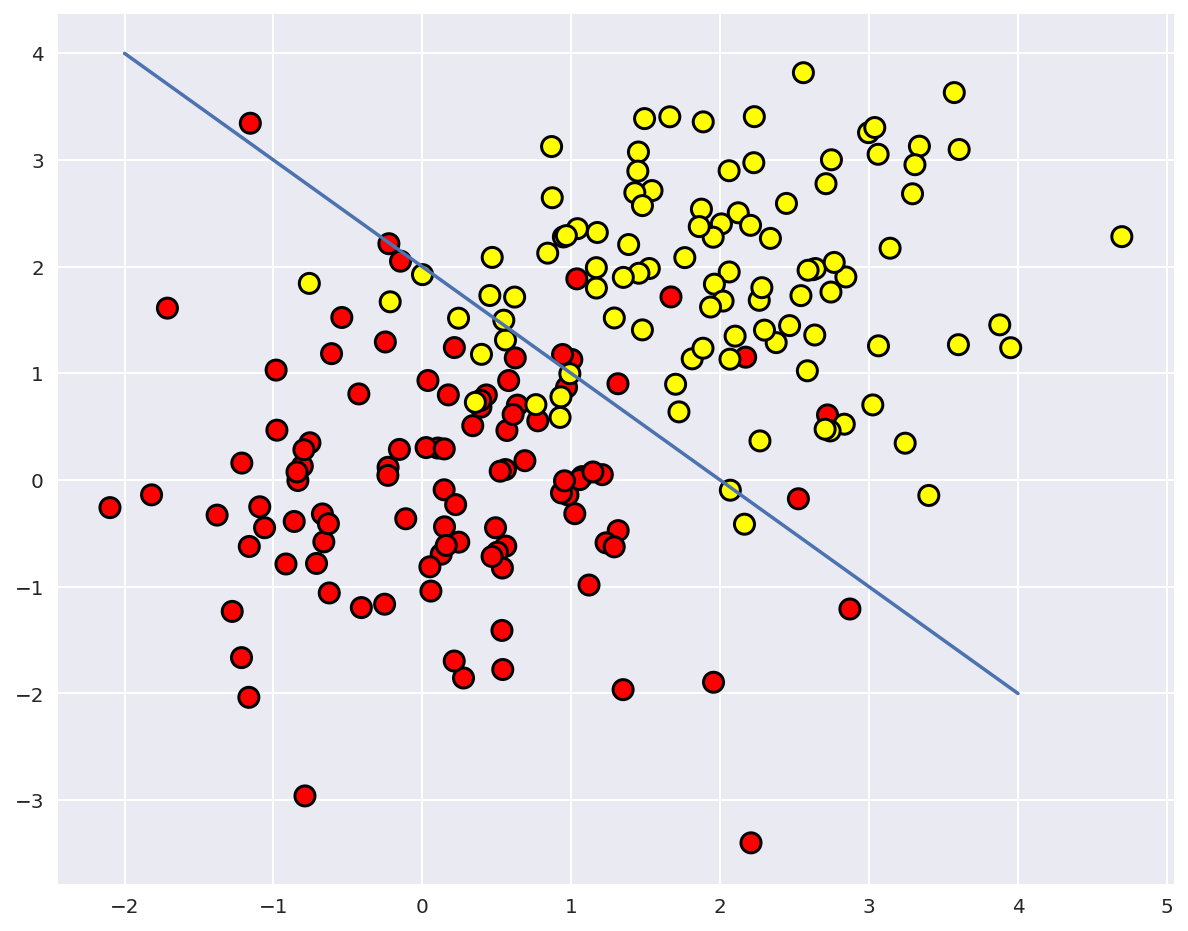

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Essayons de séparer ces deux classes en entraînant un arbre de décision via `Sklearn`. Nous allons utiliser le paramètre `max_depth` qui limite la profondeur de l'arbre. Visualisons la limite de séparation résultante.

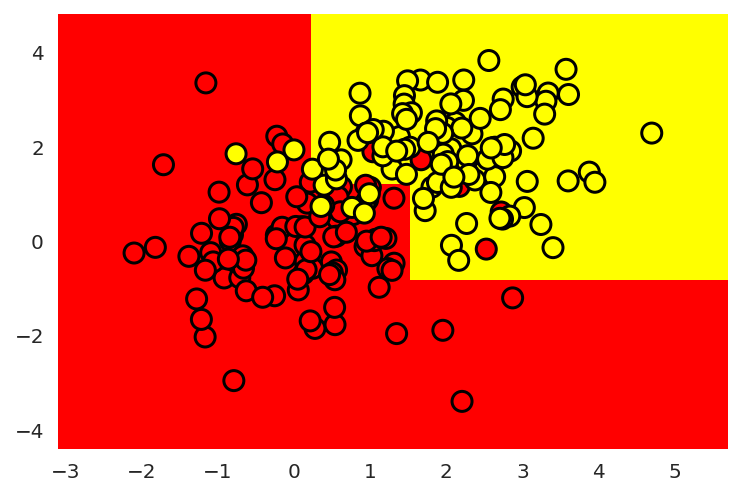

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Ecrivons une fonction auxiliaire qui retournera la grille pour plus de visualisation.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# entraînement de l'arbre
clf_tree.fit(train_data, train_labels)

# code pour représenter la surface de séparation
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

Et à quoi ressemble l'arbre lui-même? Nous voyons que l’arbre "coupe" l’espace en 8 rectangles, c’est-à-dire que l’arbre a 8 feuilles. Au sein de chaque rectangle, l’arbre effectuera la prédiction en fonction de l’étiquette majoritaire des objets qu’il contient.

In [37]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [ ]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='topic3_decision_tree1.png')

<img src="https://habrastorage.org/webt/z0/yp/wm/z0ypwmvjko4r2mymcohy7ovevwe.png" />

<div style="font-weight:700; font-size:20px"> Comment pouvons-nous "lire" un tel arbre ? </div>

Au début, il y avait 200 échantillons (instances), 100 de chaque classe. L'entropie de l'état initial était maximale, $S=1$. Ensuite, la première partition des échantillons en 2 groupes a été réalisée en comparant la valeur de $x_2$ avec celle de $1.211$ (trouver cette partie de la "bordure" dans l’image ci-dessus). Ainsi, l'entropie des groupes de gauche et de droite a diminué. Le processus se poursuit jusqu'à la profondeur 3. Dans cette visualisation, plus il y a d'échantillons de la première classe, plus la couleur orange du sommet est sombre; plus il y a d'échantillons de la deuxième classe, plus le bleu est foncé. Au début, le nombre d'échantillons de deux classes est identique, le noeud racine de l'arbre est donc blanc.

<div style="font-weight:700; font-size:20px"> Fonctionnement d'un arbre de décision avec des caractéristiques (variables) numériques </div>

Supposons que nous ayons une caractéristique numérique "Age" qui a plusieurs de valeurs uniques. Un arbre de décision cherchera la meilleure (en fonction de certains critères de gain d’information) en vérifiant les attributs binaires tels que "Age <17", "Age <22,87", etc. Mais que se passe-t-il si la tranche d'âge est large ? Ou que se passe-t-il si une autre variable quantitative, "salaire", peut également être "coupée" de plusieurs manières ? Il y aura trop d'attributs binaires à sélectionner à chaque étape de la construction de l'arborescence. Pour résoudre ce problème, des méthodes heuristiques sont généralement utilisées pour limiter le nombre de seuils auxquels nous comparons la variable quantitative.
 
Prenons un exemple. Supposons que nous ayons le jeu de données (dataset) suivant:

In [4]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Faisons un tri par âge en ordre croissant.

In [5]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='topic3_decision_tree2.png')

<img src="https://habrastorage.org/webt/8a/yv/yl/8ayvylg20qkjpt3efhucezablto.png" width=40% />

Nous voyons que l’arbre a utilisé les 5 valeurs suivantes pour évaluer l’âge : 43,5, 19, 22,5, 30 et 32 ans. Si vous regardez de plus près, ce sont exactement les valeurs moyennes entre les âges auxquels la classe cible "bascule" de 1 à 0 ou de 0 à 1. Pour illustrer davantage, 43,5 correspond à la moyenne de 38 et 49 ans; un client de 38 ans n'a pas remboursé le prêt alors que le client de 49 ans l'a fait. L'arborescence recherche les valeurs auxquelles la classe cible bascule sa valeur en tant que seuil pour "couper" une variable quantitative.
 
Compte tenu de ces informations, pourquoi pensez-vous qu'il ne soit pas logique de considérer ici une caractérstique telle que "Age <17,5"?

Prenons un exemple plus complexe en ajoutant la variable "Salary" (en milliers de dollars par an).

In [6]:
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
                      'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data2

,Age,Loan Default,Salary
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


Si nous trions par âge, la classe cible ("loan default") bascule (de 1 à 0 ou vice versa) 5 fois. Et si nous trions par salaire (salary), cela change 7 fois. Comment l’arbre choisira-t-il les caractéristiques maintenant ? Voyons voir.

In [7]:
data2.sort_values('Age')

,Age,Loan Default,Salary
0,17,1,25
2,18,1,22
3,20,0,36
7,25,1,70
8,29,1,33
9,31,0,102
10,33,1,88
4,38,1,37
5,49,0,59
6,55,0,74


In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

In [ ]:
tree_graph_to_png(tree=age_sal_tree, feature_names=['Age', 'Salary'],
                  png_file_to_save='topic3_decision_tree3.png')

<img src="https://habrastorage.org/webt/sz/xq/sn/szxqsndrwbeggreswz63mnot2wg.png" width=30% />

Nous voyons que l’arbre a été divisé par salaire et par âge. De plus, les seuils de comparaison des caractéristiques sont 43,5 et 22,5 ans et 95k et 30,5k par an. Encore une fois, nous voyons que 95 correspond à la moyenne entre 88 et 102; l'individu avec un salaire de 88k s'est avéré être "mauvais" tandis que celui avec 102k était "bon". La même chose vaut pour 30.5k. Autrement dit, seules quelques valeurs de comparaison par âge et par salaire ont été recherchées. Pourquoi l’arbre at-il choisi ces caractéristiques ?  
Parce qu'ils ont donné une meilleure partition (selon l'incertitude de Gini).

**Conclusion**: l'heuristique la plus simple pour la gestion des caractéristiques numériques dans un arbre de décision consiste à trier ses valeurs par ordre croissant et à ne vérifier que les seuils pour lesquels la valeur de la variable cible a changé.

De plus, quand un jeu de données contient de nombreuses caractéristiques numériques, chacune avec de nombreuses valeurs uniques, seuls les top-N des seuils décrits ci-dessus sont sélectionnés, c'est-à-dire n'utilisez que les top-N supérieurs qui donnent un gain maximal. Le processus consiste à construire un arbre de profondeur 1, à calculer l'entropie (ou incertitude de Gini) et à sélectionner les meilleurs seuils pour la comparaison.

Pour illustrer cela, si nous divisons par "Salary $\leq$ 34.5", le sous-groupe de gauche aura une entropie de 0 (tous les clients sont "mauvais") et celui de droite aura une entropie de 0,954 (3 "mauvais" et 5 "bons ", vous pouvez le vérifier vous-même car cela fera partie de la mission). Le gain d'information est d'environ 0,3.
Si nous séparons par "Salary $\leq$ 95", le sous-groupe de gauche aura une entropie de 0,97 (6 "mauvais" et 4 "de bon"), et celui de droite aura une entropie de 0 (un groupe ne contenant qu'un seul objet). Le gain d'information est d'environ 0,11.
Si nous calculons le gain d'informations pour chaque partition de cette manière, nous pouvons sélectionner les seuils pour la comparaison de chaque caractéristique numérique avant la construction d'un grand arbre (en utilisant toutes les caractéristiques).

Des exemples supplémentaires de discrétisation de caractéristiques numériques peuvent être trouvés dans des articles tels que ["A Simple Guide to Entropy-Based Discretization" or "Discretizing a continuous variable using Entropy"](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) ou ["Discretizing a continuous variable using Entropy"](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). L'un des articles scientifiques les plus en vue sur ce sujet est "On the handling of continuous-valued attributes in decision tree generation" (UM Fayyad. KB Irani, "Machine Learning", 1992).

<div style="font-weight:700;font-size:20px">Paramètres importants  de l'arbre de décision</div>

Techniquement, vous pouvez créer un arbre de décision jusqu’à ce que chaque feuille ait exactement une instance, mais cela n’est pas courant en construisant un seul arbre, car il sera *overfitted* (en sur-apprentissage), ou trop ajusté au jeu d’entraînement, et ne pourra pas bien prédire les étiquettes pour les nouvelles données. Au bas de l’arbre, à une certaine profondeur, il y aura des partitions sur des caractéristiques moins importantes (par exemple, si un client est originaire de Leeds ou de New York). Nous pouvons exagérer davantage cette histoire et constater que les quatre clients qui sont venus à la banque pour un prêt en pantalon vert n'ont pas remboursé le prêt. Même si cela était vrai lors de l'entraîtement, nous ne souhaitons pas que notre modèle de classification génère de telles règles spécifiques.
 
Il existe deux exceptions où les arbres sont construits à la profondeur maximale :
- Random Forest (un groupe d'arbres) calcule la moyenne des réponses d'arbres individuels construits à la profondeur maximale (nous verrons plus loin pourquoi vous devriez le faire).
- *Pruning trees* (Élagage des arbres). Dans cette approche, l'arbre est d'abord construit à la profondeur maximale. Ensuite, de bas en haut, certains nœuds de l’arbre sont supprimés (élagués) en comparant la qualité de l’arbre avec et sans cette partition (la comparaison est effectuée à l’aide de la *cross-validation* (validation croisée), que vous voyons plus bas).

L'image ci-dessous est un exemple de bordure (frontière) de séparation construite dans un arbre sur-appris.

<img align='center' src='https://habrastorage.org/files/f9f/3b5/133/f9f3b5133bae460ba96ab7e546155b1d.png'><br>

Les moyens les plus courants de gérer le sur-apprentissage dans les arbres de décision sont les suivants:
- limitation artificielle de la profondeur ou un nombre minimal d'échantillons dans les feuilles : la construction d'un arbre s'arrête juste à un moment donné;
- élagage de l'arbre

<div style="font-weight:700;font-size:20px"> La classe DecisionTreeClassifier dans Scikit-learn </div>

Les principaux paramètres de la classe [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) sont les suivants:

- `max_depth` - la profondeur maximale de l'arbre;
- `max_features` - le nombre maximal de caractéristiques avec lesquelles rechercher la meilleure partition (nécessaire avec un grand nombre de caractéristiques car il serait "coûteux" de rechercher des partitions pour *toutes* les caractéristiques);
- `min_samples_leaf` - nombre minimal d'échantillons dans une feuille. Ce paramètre empêche de créer des arbres où n'importe quelle feuille n'aurait que quelques membres.

Les paramètres de l'arbre doivent être définis en fonction des données d'entrée. Cette opération est généralement effectuée à l'aide d'une *validation croisée* (voir ci-dessous).

<div style="font-weight:700;font-size:20px"> Arbre de décision dans un problème de régression </div>

Lors de la prédiction d'une variable numérique, l'idée d'une construction d'arborescence reste la même, mais les critères de qualité changent:

- Variance :

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2, $$

où $\ell$ est le nombre d'échantillons dans une feuille, $y_i$ est la valeur de la variable cible. En termes simples, en minimisant la variance, nous recherchons les caractéristiques qui divisent les données d’entraînement de manière à ce que les valeurs de la caractéristique cible dans chaque feuille soient à peu près égales.

<div style="font-weight:700;font-size:20px"> Exemple </div>


Générons des données distribuées par la fonction $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ avec du bruit (with some noise). Ensuite, nous allons entraîner cet arbre avec ces données et les prédictions qu’il réalise.

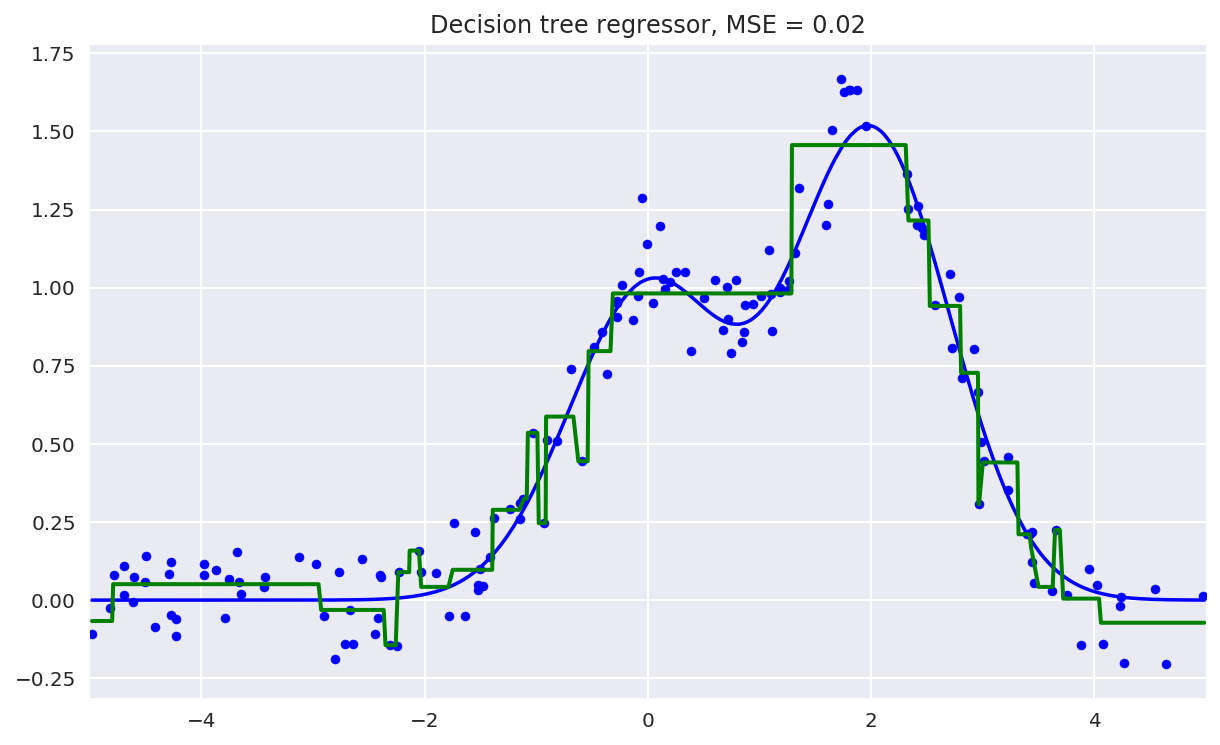

In [38]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

Nous voyons que l’arbre de décision rapproche les données d’une fonction constante par morceaux.

## 3. La méthode des plus proches voisins

*La méthode des plus proches voisisn* (k-plus proches voisins, ou k-NN) est une autre méthode de classification très répandue qui est parfois également utilisée dans les problèmes de régression. Comme les arbres de décision, c'est l’une des approches les plus compréhensibles de la classification. L'intuition sous-jacente est que vous ressemblez à vos voisins. Plus formellement, la méthode suit l’hypothèse de "compacité" : si la distance entre les exemples est suffisamment bien mesurée, des exemples similaires ont alors bien plus de chances d’appartenir à la même classe.

Selon la méthode des plus proches voisins, la balle verte serait classée comme "bleue" plutôt que "rouge".

<img src="https://habrastorage.org/webt/f-/bq/ey/f-bqeydaszcsrslhsmzkymb-y8s.png" />

Pour un autre exemple, si vous ne savez pas comment étiqueter (classer) un casque Bluetooth parmi d'autres sur Internet, vous pouvez trouver 5 casques similaires, et si 4 d'entre eux sont étiquetés comme "accessoires" et seulement 1 comme "Technologie", alors vous l'étiqueterez également sous "accessoires".
 
Pour classifier chaque échantillon du jeu de données de test, vous devez effectuer les opérations suivantes dans l'ordre indiqué:
1. Calculez la distance par rapport à chacun des échantillons du jeu d’entraînement.
2. Sélectionnez des échantillons $k$ dans l'ensemble d'apprentissage avec la distance minimale qui les sépare.
3. La classe de l'échantillon de test sera la classe la plus fréquente parmi les voisins les plus proches de $k$.

La méthode s’adapte assez facilement au problème de régression: à l’étape 3, elle ne renvoie pas la classe, mais le nombre - une moyenne (ou médiane) de la variable cible parmi les voisins.
 
Une caractéristique notable de cette approche est sa paresse - les calculs ne sont effectués que pendant la phase de prévision, lorsqu'un échantillon de test doit être classifié. Aucun modèle n'est construit à partir des exemples d'entraînement à l'avance. En revanche, rappelez-vous que pour les arbres de décision dans la première moitié de cet article, l’arbre est construit sur la base du jeu d’entraînement, et que la classification des cas de test se produit relativement rapidement lorsqu’on parcourt l’arbre.
 
Les voisins les plus proches est une approche bien étudiée. Il existe de nombreux théorèmes importants affirmant que, sur des jeux de données "sans fin", il s'agit de la méthode de classification optimale. Les auteurs du livre classique "The Elements of Statistical Learning" considèrent k-NN comme un algorithme théoriquement idéal dont l'utilisation n'est limitée que par la puissance de calcul et la (malédiction de la dimensionnalité) [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

<div style="font-weight:700;font-size:20px"> La méthode des plus proches voisins dans les applications réelles </div>

- k-NN peut servir de bon point de départ (base) dans certains cas;
- Dans les compétitions Kaggle, le k-NN est souvent utilisé pour la construction de méta-caractéristiques (prédictions de k-NN en tant qu'entrée dans d'autres modèles) ou pour l'empilement / le mélange;
- La méthode des plus proches voisins s'étend à d'autres tâches telles que les systèmes de recommandation. La décision initiale pourrait être une recommandation d'un produit (ou service) populaire parmi les *plus proches voisins* de la personne pour laquelle nous souhaitons faire une recommandation;
- En pratique, sur de grands ensembles de données, des méthodes de recherche approximatives sont souvent utilisées pour les plus proches voisins. Un certain nombre de bibliothèques open source implémentent de tels algorithmes; consultez la bibliothèque de Spotify [Annoy](https://github.com/spotify/annoy).

La qualité de la classification/régression avec k-NN dépend de plusieurs paramètres:

- Le nombre de voisins $k$.
- La distance mesurée entre les échantillons (les distances communes incluent les distances de Hamming, Euclidienne, Cosinus et Minkowski). Notez que la plupart de ces métriques exigent que les données soient mises à l'échelle. En termes simples, nous ne voulons pas que la caractéristique «salaire», qui est de l’ordre de milliers, affecte davantage la distance que «l’âge», qui est généralement inférieur à 100.
- Poids des voisins (chaque voisin peut avoir des poids différents : par exemple, plus l'échantillon est large, plus le poids est bas).

<div style="font-weight:700;font-size:20px"> La classe `KNeighborsClassifier` dans Scikit-learn </div>

Les principaux paramètres de la classe `sklearn.neighbors.KNeighborsClassifier` sont les suivants:
- weights: `uniform` (tous les poids sont égaux), `distance` (le poids est inversement proportionnel à la distance à l'échantillon de test) ou toute autre fonction définie par l'utilisateur;
- algorithm (facultatif): `brute`, `ball_tree`, `KD_ tree` ou `auto`. Dans le premier cas, les voisins les plus proches pour chaque cas de test sont calculés par une recherche sur la grille sur l'ensemble du jeu d'apprentissage ou d'entraînement. Dans les deuxième et troisième cas, les distances entre les exemples sont stockées dans un arbre pour accélérer la recherche des voisins les plus proches. Si vous définissez ce paramètre sur `auto`, la bonne façon de trouver les voisins sera automatiquement choisie en fonction du jeu d’entraînement.
- leaf_size (facultatif): seuil pour passer à la recherche sur la grille si l'algorithme de recherche de voisins est BallTree ou KDTree;
- metric : (métrique) `minkowski`,` manhattan`, `euclidien`,` chebyshev` ou autre.

## 4. Choix des paramètres du modèle et validation croisée

La tâche principale de l’apprentissage des algorithmes est de pouvoir *généraliser* à des données nouvelles. Comme nous ne pouvons pas vérifier immédiatement les performances du modèle sur les nouvelles données entrantes (car nous ne connaissons pas encore les valeurs vraies de la variable cible), il est nécessaire de sacrifier une petite partie des données pour en vérifier la qualité du modèle.

Cela se fait souvent de deux manières:
- mettre de côté une partie du jeu de données (*held-out/hold-out set*). Ainsi, nous préservons une fraction de l'ensemble du jeu d'apprentissage (généralement de 20% à 40%), entraînons le modèle sur les données restantes (60 à 80% de l'ensemble initial) et calculons les mesures de performance du modèle (par exemple, la précision) sur la base de données préservée (hold-out set).  
- *validation croisée *. Le cas le plus fréquent ici est la *validation croisée par k-fold*.

<img src="https://habrastorage.org/webt/80/nx/1p/80nx1pa4iet33x9pw-bj02khyhs.png" />

Dans la validation croisée k-fold, le modèle est entraîné $K$ fois sur différents sous-ensembles ($K-1$) du jeu de données d'origine (en blanc) et vérifié sur le sous-ensemble restant (à chaque fois un différent, montré ci-dessus en orange).
Nous obtenons des évaluations de la qualité du modèle $K$ généralement moyennées pour donner une qualité moyenne globale de classification/régression.

La validation croisée fournit une meilleure évaluation de la qualité du modèle sur les nouvelles données par rapport à l'approche _hold-out_ du jeu de données. Cependant, la validation croisée est coûteuse en calcul lorsque vous avez beaucoup de données.
 
La validation croisée est une technique très importante en apprentissage automatique et peut également être appliquée en statistique et en économétrie. Cela facilite le réglage de l'hyperparamètre, la comparaison des modèles, l'évaluation des fonctionnalités, etc. Plus de détails sont disponibles [ici](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) (article de blog de Sebastian Raschka) ou dans n'importe quel manuel classique sur l'apprentissage automatique (ou de statistique).

## 5. Exemples d'application et cas complexes  

<br>

<div style="font-weight:700;font-size:20px"> Arbres de décision et méthode des plus proches voisins dans une tâche de prédiction de désabonnement client (taux d'attrition) </div>


Lisons les données dans un `DataFrame` et pré-traitons-les. Stockez la caractéristique *State* dans un objet `Series` séparé pour le moment et supprimez-le du dataframe. Nous allons entraîner le premier modèle sans la caractéristique *State*, puis nous verrons si cela peut aider.

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [40]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Allouons 70% du jeu d'entraînement (`X _train`,` y_ train`) et 30% au jeu de test (`X _holdout`,` y_holdout`). Le jeu de données de test ne sera pas impliqué dans le réglage des paramètres des modèles. Nous l'utilisons à la fin, après le réglage, pour évaluer la qualité du modèle obtenu. Entraînons 2 modèles : arbre de décision et k-NN. Nous ne savons pas quels paramètres sont bons, nous allons donc en supposer quelques uns  de manière aléatoire : une profondeur d'arbre de 5 et le nombre de plus proches voisins de 10.

In [41]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Évaluons la qualité des prévisions sur notre jeu de données avec une métrique simple, la proportion de réponses correctes (exactitude ou précision). L’arbre de décision s’est mieux comporté : le pourcentage de réponses correctes est d’environ 94% (arbre de décision) contre 88% (k-NN). Notez que cette performance est obtenue en utilisant des paramètres aléatoires.

In [42]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.94

In [43]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred) # 0.89

0.89

Identifions maintenant les paramètres de l’arbre en utilisant la validation croisée. Nous allons ajuster la profondeur maximale et le nombre maximal d’entités utilisées à chaque division (partition ou partage). Voici l'essentiel du fonctionnement de GridSearchCV : pour chaque paire unique de valeurs `max_depth` et `max_features`, calculez les performances du modèle avec une 5-fold validation croisée, puis sélectionnez la meilleure combinaison de paramètres.

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Énumérons les meilleurs paramètres et la précision moyenne correspondante à partir de la validation croisée.

In [17]:
tree_grid.best_params_ #{'max_depth': 6, 'max_features': 17}

{'max_depth': 6, 'max_features': 17}

In [18]:
tree_grid.best_score_ #0.94256322331761677

0.9425632233176168

In [19]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout)) #0.946

0.946

Affichons l'arbre résultant. Comme il ne s’agit pas uniquement d’un exemple basé sur un jeu (sa profondeur maximale est de 6), l'image n’est pas si petite, mais vous pouvez "naviguer" sur l’arbre en cliquant sur l'image.

In [ ]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns,
                 png_file_to_save='topic3_decision_tree4.png')

<img src="https://habrastorage.org/webt/0i/xs/yb/0ixsyb-galpvl9wkvyhasu8f0i8.png" />

Maintenant, ajustons le nombre de voisins $k$ pour k-NN:

In [45]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.0s finished


({'knn__n_neighbors': 7}, 0.8859837119588513)

In [21]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) # 0.89

0.89

Ici, l’arbre s’est avéré meilleur que l’algorithme des plus proches voisins : exactitude de 94,2%/94,6% pour la validation croisée et le hold-out respectivement. Les arbres de décision fonctionnent très bien et même les forêts aléatoires ou random forest (considérons-le pour le moment comme un groupe d’arbres qui fonctionnent mieux ensemble) dans cet exemple ne peuvent pas atteindre de bien meilleures performances (95,1%/95,3%) bien qu’elles aient été entraînées beaucoup plus longtemps.

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9494233119813256


In [26]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 12.7min finished


({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [24]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.953

<div style="font-weight:700;font-size:20px"> Cas complexes pour les arbres de décision </div>

Pour poursuivre la discussion sur les avantages et les inconvénients des méthodes en question, considérons une tâche de classification simple, dans laquelle un arbre fonctionnerait bien mais le faisait de manière "trop compliquée". Créons un ensemble de points sur un plan (2 entités), chaque point sera l’une des deux classes (+1 pour le rouge ou -1 pour le jaune). Si vous le considérez comme un problème de classification, cela semble très simple : les classes sont séparées par une ligne.

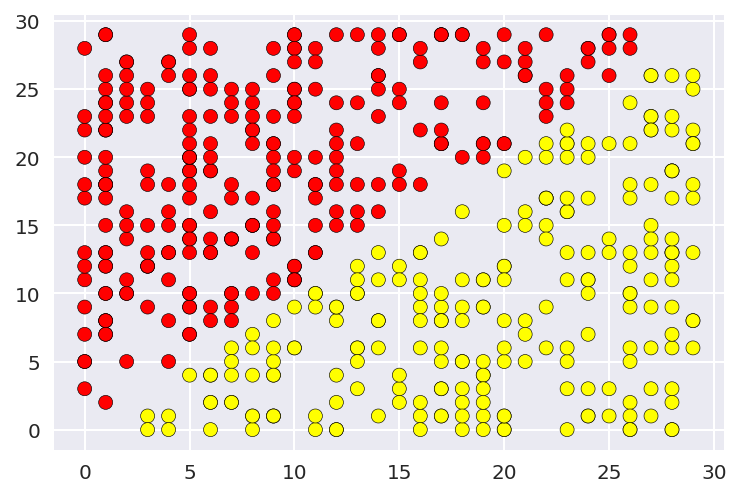

In [77]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

Cependant, la frontière créée par l'arbre de décision est trop compliquée; et l'arbre lui-même est très profond. En outre, imaginez à quel point l’arbre se généralisera pour un espace au-delà des carrés $30 \times 30$ qui encadrent le jeu de données d’entraînement.

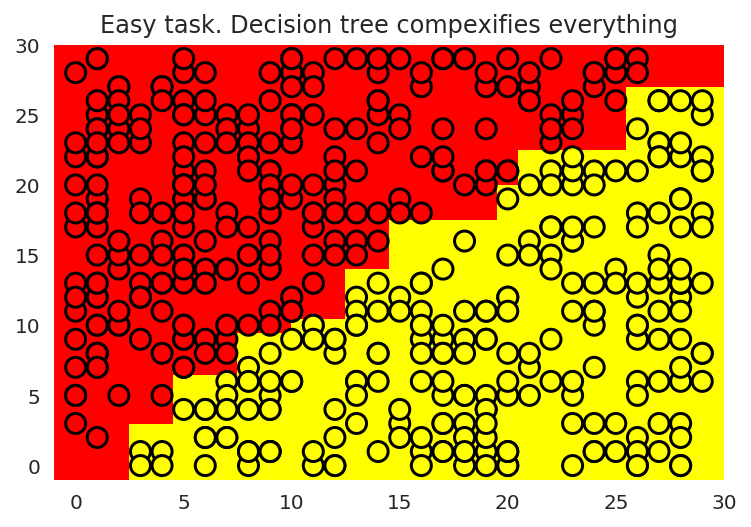

In [78]:
#from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

Nous avons obtenons cette construction trop complexe, bien que la solution soit juste une ligne doite de la forme $x_1 = x_2$.

In [ ]:
tree_graph_to_png(tree=tree, feature_names=['x1', 'x2'],
         png_file_to_save='topic3_decision_tree5.png')

<img src="https://habrastorage.org/webt/az/ld/yj/azldyj0ija_sxkk438m959qpf0w.png" />

La méthode du voisin le plus proche est meilleure que l’arbre, mais n’est pas aussi efficace qu’un classifieur linéaire (notre sujet suivant).

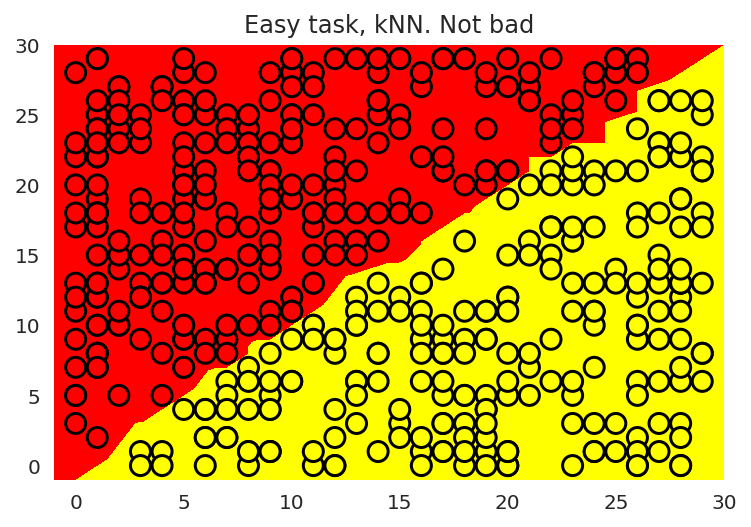

In [79]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

<div style="font-weight:700;font-size:20px"> Arbres de décision et k-NN dans une tâche de reconnaissance manuscrite de chiffres du MNIST </div>

Voyons maintenant comment ces 2 algorithmes fonctionnent sur une tâche tirée du monde réel. Nous allons utiliser le jeu de données intégré dans `sklearn` sur des chiffres manuscrits. Cette tâche est un exemple où k-NN fonctionne étonnamment bien.
 
Les images sont des matrices 8x8 (intensité de la couleur blanche pour chaque pixel). Ensuite, chacune de ces matrices est "unfolded" (étalée, dépliée) en un vecteur de longueur 64 et nous obtenons une description des caractéristiques d'un objet.
 
Affichons quelques chiffres manuscrits. Nous voyons que l'on peut les distinguer.

In [54]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

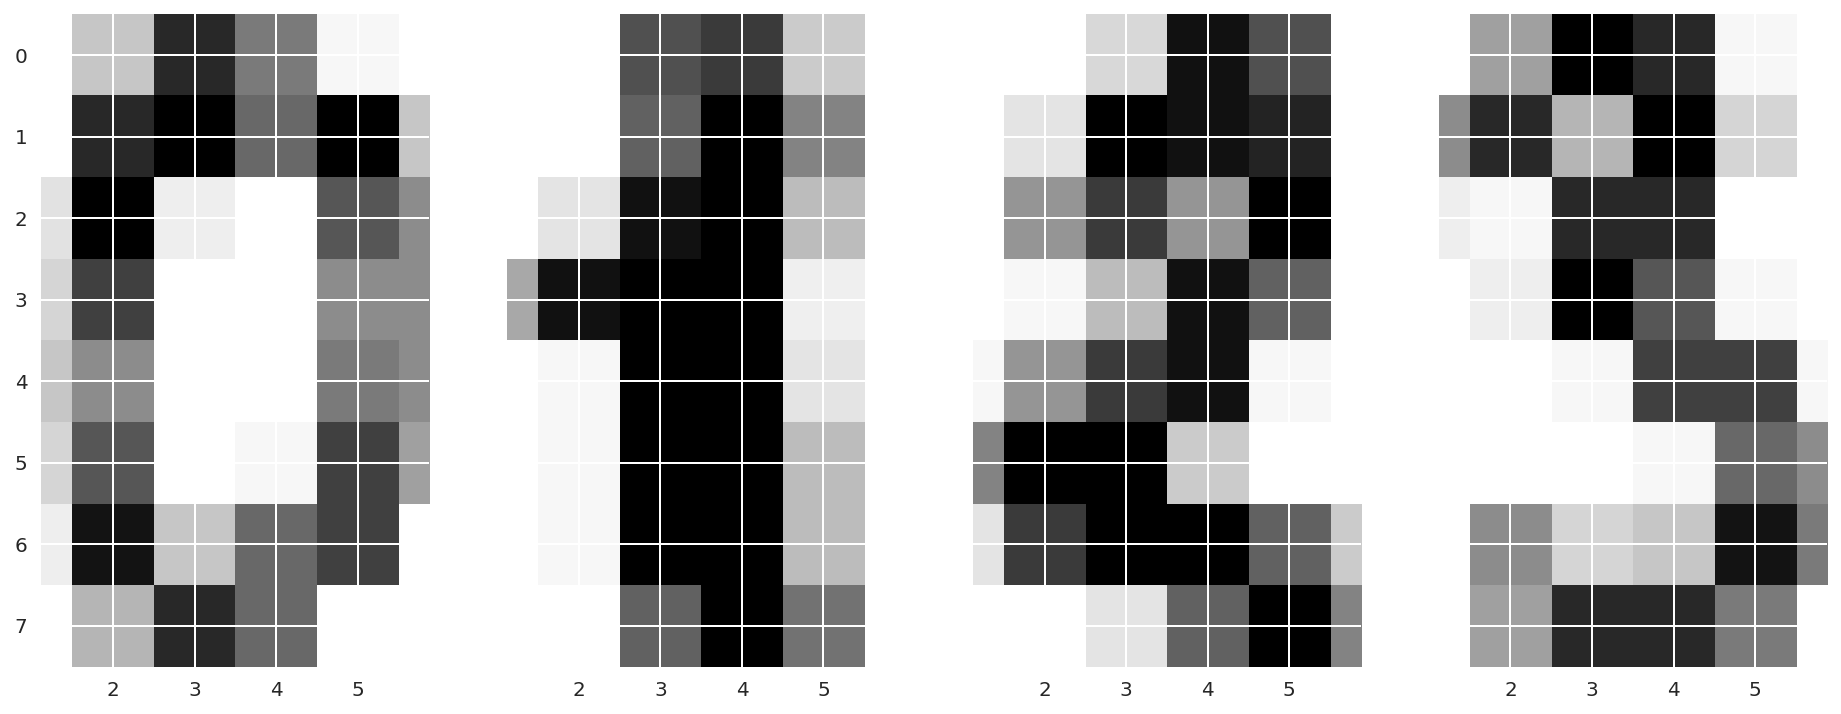

In [55]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

Faisons ensuite la même expérience que dans la tâche précédente, mais cette fois, changeons les plages des paramètres ajustables.

Sélectionnons 70% de l’ensemble des données pour l'entraînement (`X _train`,`y_train`) et 30% pour la phase de test (`X _holdout`,` y_holdout`). Le jeu de test ne participera pas au réglage des paramètres du modèle; nous allons l’utiliser à la fin pour vérifier la qualité du modèle obtenu.

In [66]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

Entraînons un arbre de décision et k-NN avec nos paramètres aléatoires.

In [67]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

Faisons maintenant des prédictions sur notre groupe de référence ( holdout set). Nous pouvons voir que k-NN a fait beaucoup mieux, mais notez que c'est avec des paramètres aléatoires.

In [69]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.976, 0.666)

(0.975925925925926, 0.6666666666666666)

Réglons maintenant les paramètres de notre modèle en utilisant la validation croisée, mais nous allons maintenant tenir compte du fait que nous avons plus de caractéristiques que dans la tâche précédente : 64.

In [70]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Voyons la meilleure combinaison de paramètres et la précision correspondante de la validation croisée :

In [71]:
tree_grid.best_params_, tree_grid.best_score_ # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

Cela a déjà dépassé 66 % mais pas tout à fait 97 %. kNN fonctionne mieux sur ce jeu de données. Dans le cas d'un plus proche voisin, nous avons pu atteindre 99% des conjectures sur la validation croisée.

In [72]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) # 0.987

0.9865458422397149

Formons une forêt aléatoire (random forest) sur le même jeu de données, cela fonctionne mieux que kNN sur la majorité du jeux de données. Mais nous avons ici une exception.

In [73]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) # 0.935

0.9349085619110404

Vous auriez raison de signaler que nous n’avons pas réglé de paramètres `RandomForestClassifier` ici. Même avec le réglage, la précision de l’entraînement n’atteint pas 98% comme elle l’a fait avec un voisin proche.

Résultats
*(Légende: CV et Holdout sont des parts moyennes des réponses correctes pour la validation inter-modèle et l'échantillon de référence. DT correspond à un arbre de décision, k-NN représente les k-voisins les plus proches, RF correspond à une forêt aléatoire) .*

|   algo\eval      |   CV  | Holdout |  
|---------|-------|---------|
| **DT**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |
| **RF**  | 0.935 |  0.941  | 

La **conclusion** de cette expérience (et conseil général) : vérifiez d’abord des modèles simples sur vos données : arbre de décision et voisins les plus proches (ensuite, nous ajouterons également une régression logistique à cette liste). Il se peut que ces méthodes fonctionnent déjà suffisamment bien.

<div style="font-weight:700;font-size:20px"> Cas complexe pour les plus proches voisins </div>

Considérons un autre exemple simple. Dans le problème de la classification, une des caractéristiques sera simplement proportionnelle au vecteur de réponses, mais cela n’aidera pas pour la méthode des plus proches voisins.

In [74]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

Comme toujours, nous examinerons la précision de la validation croisée et du jeu données de test. Construisons des courbes reflétant la dépendance de ces quantités sur le paramètre `n_neighbors` dans la méthode des plus proches voisins. Ces courbes s'appellent des courbes de validation.

On peut voir que k-NN avec la distance euclidienne ne fonctionne pas bien sur le problème, même si vous faites varier le nombre des plus proches voisins sur une large plage. En revanche, l’arbre de décision "détecte" facilement les dépendances cachées dans les données malgré une restriction de la profondeur maximale.

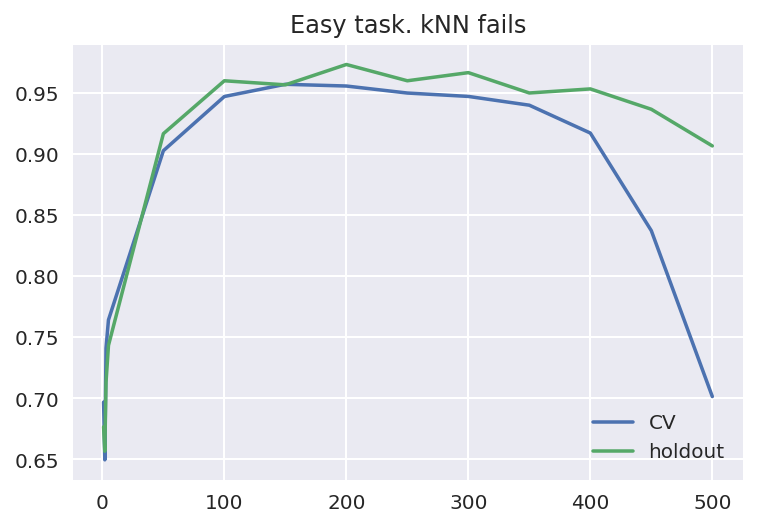

In [75]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=k))])
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [76]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


Dans le second exemple, l’arbre a parfaitement résolu le problème alors que k-NN rencontrait des difficultés. Cependant, très probablement, il s’agit là d’un inconvénient de l’utilisation de la distance euclidienne. Qui ne nous a pas permis de révéler qu'une caractéristique était bien meilleure que les autres.

## 6. Avantages et inconvénients des arbres de décision et de la méthode des K-NN

<br>

<div style="font-weight:700;font-size:20px"> Arbres de décision </div>

Avantages:
- Génération de règles de classification claires, compréhensibles par l’homme, par ex. "si l'âge <25 et est intéressé par les motos, refuser le prêt". Cette propriété s'appelle l'interprétabilité du modèle.
- Les arbres de décision peuvent être facilement visualisés, c’est-à-dire que le modèle lui-même (l’arbre) et la prédiction pour un certain objet de test (un chemin dans l’arbre) peuvent "être interprétés".
- Formation rapide et prévision.
- Petit nombre de paramètres de modèle.
- Prend en charge les caractéristiques numériques et catégorielles.

Les inconvénients:
 
- les arbres sont très sensibles au bruit dans les données d'entrée; l'ensemble du modèle peut changer si l'ensemble du jeu d'apprentissage est légèrement modifié (par exemple, supprimer une caractéristique, ajouter des objets). Cela nuit à l’interprétabilité du modèle.
- La frontière de séparation construite par un arbre de décision a ses limites - elle consiste en hyperplans perpendiculaires à l'un des axes de coordonnées, dont la qualité est inférieure à celle de certaines autres méthodes, en pratique.
- Nous devons éviter les surajustements en élaguant, en fixant un nombre minimal d'échantillons dans chaque feuille ou en définissant une profondeur maximale pour l'arbre. Notez que le surajustement est un problème pour toutes les méthodes d’apprentissage automatique.
- instabilité. De petites modifications apportées aux données peuvent modifier considérablement l’arbre de décision. Ce problème est traité avec des ensembles d'arbres de décision (discutés la prochaine fois).
- Le problème de recherche de l'arbre de décision optimal est "NP-complete". Certaines méthodes heuristiques sont utilisées dans la pratique, telle que la recherche "gourmande" (voir algorithme de glouton) d’une caractéristique offrant un maximum d’informations, mais ne garantissent pas de trouver généralement l'arbre de décision optimal.
- Difficultés à supporter les valeurs manquantes dans les données. Friedman a estimé qu'il fallait environ 50% du code pour prendre en charge les données manquantes dans CART (une version améliorée de cet algorithme est implémentée dans `sklearn`).
- Le modèle ne peut qu'interpoler mais pas extrapoler (il en va de même pour les forêts aléatoires (random forest) et les (tree boosting) boosting d'arbres). C'est-à-dire qu'un arbre de décision effectue une prédiction constante pour les objets situés au-delà du cadre de sélection défini par le jeu d'entraînement dans l'espace de fonction. Dans notre exemple avec les boules jaunes et bleues, cela signifierait que le modèle donne les mêmes prédictions pour toutes les boules avec des positions >19 ou <0.

<div style="font-weight:700;font-size:20px"> La méthode des plus proches voisins ou K-NN </div>

Avantages:
- mise en œuvre simple;
- bien étudié;
- En règle générale, la méthode est une bonne première solution non seulement pour la classification ou la régression, mais également pour les recommandations;
- Il peut être adapté à un problème donné en choisissant les métriques ou le noyau appropriés (en un mot, le noyau peut définir l'opération de similarité pour des objets complexes tels que des graphes tout en maintenant la même approche de k-NN). Au fait, [Alexander Dyakonov](https://www.kaggle.com/dyakonov), ancien kaggler du top-1, aime le k-NN le plus simple, mais avec la métrique de similarité d'objet accordée;
- bonne interprétabilité. Il existe des exceptions: si le nombre de voisins est important, l’interprétabilité se dégrade ("Nous ne lui avons pas accordé de prêt, car il est semblable aux 350 clients, dont 70 sont des mauvais clients, soit 12% de plus que la moyenne". pour le jeu de données ").

Les inconvénients:
- Méthode considérée rapide par rapport aux compositions d'algorithmes, mais le nombre de voisins utilisés pour la classification est généralement élevé (100-150) dans la vie réelle, auquel cas l'algorithme ne fonctionnera pas aussi rapidement qu'un arbre de décision.
- Si un jeu de données comporte de nombreuses variables, il est difficile de trouver les poids appropriés et de déterminer les caractéristiques qui ne sont pas importantes pour la classification/régression.
- Dépendance de la métrique de distance sélectionnée entre les objets. La sélection de la distance euclidienne par défaut est souvent sans fondement. Vous pouvez trouver une bonne solution en effectuant une recherche sur les paramètres via la recherche sur grille (grid search), mais cela prend beaucoup de temps pour les grands ensembles de données.
- Il n’existe pas de méthode théorique pour choisir le nombre de voisins - uniquement une recherche sur grille (même si cela est souvent vrai pour tous les hyperparamètres de tous les modèles). Dans le cas d’un petit nombre de voisins, la méthode est sensible aux valeurs aberrantes, c’est-à-dire qu’elle est encline au sur-apprentissage.
- En règle générale, cela ne fonctionne pas bien lorsqu'il y a beaucoup de fonctionnalités en raison de la "malédiction de la dimensionnalité". Le professeur Pedro Domingos, membre bien connu de la communauté du ML, en parle [ici](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) dans son célèbre article "A Few Useful Things to Know about Machine Learning"; Le livre Deep Learning de [ce chapitre](http://www.deeplearningbook.org/contents/ml.html) décrit également "la malédiction de la dimensionnalité".

C'est beaucoup d'informations, mais j'espère que cet article sera une excellente référence pour vous pendant longtemps :)

## 7. Mission de démonstration
Pour vous entraîner à construire des arbres de décision de classification avec Scikit-learn, vous pouvez compléter [cette mission](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees). C'est juste une mission d'entraînement avec la [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution).

## 8. Ressources utiles
- Cours principal [site](https://mlcourse.ai), [repo github du cours](https://github.com/Yorko/mlcourse.ai) et YouTube [chaîne](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- [mlcourse.ai](https://mlcourse.ai) conférences sur les arbres de décision : [théorie](https://youtu.be/H4XlBTPv5rQ) et [partie pratique](https://youtu.be/RrVYO6Td9Js)
- Medium ["article"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighs-8613c6b6d2cd) basé sur ce notebook
- Matériel de cours en tant que [jeu de données Kaggle](https://www.kaggle.com/kashnitsky/mlcourse)
- Si vous lisez le russe: un [article](https://habrahabr.ru/company/ods/blog/322534/) sur Habrahabr contenant le même matériel. Et une [conférence](https://youtu.be/p9Hny3Cs6rk) sur YouTube
- Les arbres de décision et k plus prochues voisins sont couverts pratiquement dans chaque livre ML. Nous recommandons «Pattern Recognition and Machine Learning» (C. Bishop) et «Machine Learning: A Probabilistic Perspective» (K. Murphy).
- Le livre “Machine Learning in Action” (P. Harrington) vous guidera à travers la mise en œuvre des algorithmes ML classiques en pur Python.
- La libraire [Scikit-learn](http://scikit-learn.org/stable/documentation.html). Ces gars travaillent dur pour écrire une documentation très claire.
- Scipy 2017 [tutoriel scikit-learn](https://github.com/amueller/scipy-2017-sklearn) par Alex Gramfort et Andreas Mueller.
- Un autre [cours de ML](https://github.com/diefimov/MTH594_ MachineLearning) avec un très bon matériel.
- [Implémentations](https://github.com/rushter/MLAlgorithms) de nombreux algorithmes ML. Bon pour la recherche d'arbres de décision et de k-NN.